# Support Vector Machine

Objective: Cell Samples recognition (benign or malignant)  
Dataset: cell_saimples.csv  
Ref:  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('cell_samples.csv') #2=benign, 4=malignant
print(data.shape)
data.head()

(699, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [3]:
data.drop(['BareNuc'],axis=1,inplace=True)

## Data Exploration

2    458
4    241
Name: Class, dtype: int64


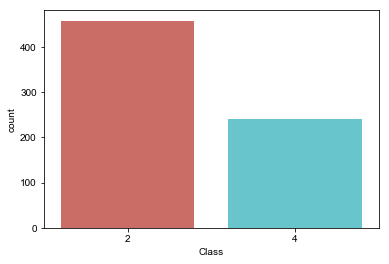

In [4]:
print(data['Class'].value_counts())

sns.countplot(x='Class',data = data, palette='hls',order = data['Class'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

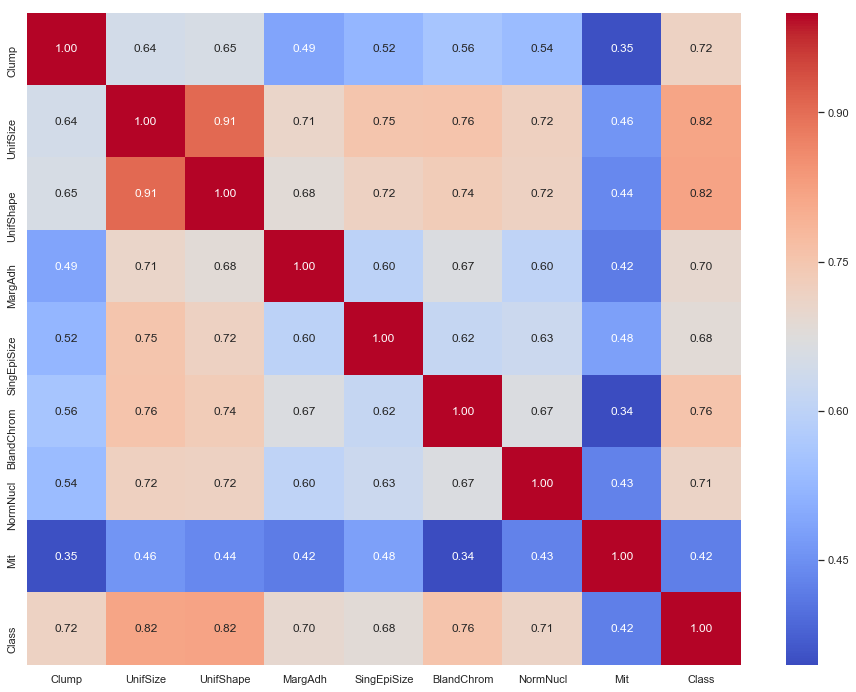

In [5]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["Class"].sort_values(ascending=False)

Class          1.000000
UnifShape      0.818934
UnifSize       0.817904
BlandChrom     0.756616
Clump          0.716001
NormNucl       0.712244
MargAdh        0.696800
SingEpiSize    0.682785
Mit            0.423170
ID            -0.080226
Name: Class, dtype: float64

## Data Processing and Selection

In [7]:
#Feature dataset
X=data.iloc[:, 1:-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (699, 8)


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1


In [8]:
#Target dataset
y = data["Class"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (699,)


0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [9]:
#Normalizae X dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (699, 8)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.17966213, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
        -0.17966213, -0.28411186, -0.34391178]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## SVM

In [11]:
#Default Parameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(gamma='auto') #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Kernel Accuracy Score')
print('- Default:',round(metrics.accuracy_score(y_test,y_pred),4))

#Linear Kernel
svc=SVC(kernel='linear', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Linear :',round(metrics.accuracy_score(y_test,y_pred),4))

#RBF Kernel
svc=SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- RBF    :', round(metrics.accuracy_score(y_test,y_pred),4))

#Polynomial kernel
svc=SVC(kernel='poly', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Polynomial:', round(metrics.accuracy_score(y_test,y_pred),4))

Kernel Accuracy Score
- Default: 0.9643
- Linear : 0.9643
- RBF    : 0.9643
- Polynomial: 0.9571


In [12]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Linear accuracy score:', round(accuracy_score,4))

Linear accuracy score: 0.9643


## Test Prediction

In [18]:
df_pred1 = data[data.index == 601]
df_pred2 = data[data.index == 333]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
601,1344449,1,1,1,1,1,2,1,1,2
333,785208,5,4,6,6,4,4,3,1,4


In [19]:
df_pred=df_pred.iloc[:, 1:-1]
scaler = StandardScaler()
scaler.fit(df_pred)
df_pred = scaler.transform(df_pred)

predict_result=svc.predict(df_pred)
#label category, benign -> 1, malignant -> 0
predict_result

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([2, 4], dtype=int64)